In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [14]:
batch_size = 128
nb_classes = 10

img_rows, img_cols = 28,28

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0],1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0],1, img_rows, img_cols)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print("One hot encoding: {}".format(Y_train[0, :]))

('X_train shape:', (60000, 1, 28, 28))
(60000, 'train samples')
(10000, 'test samples')
One hot encoding: [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


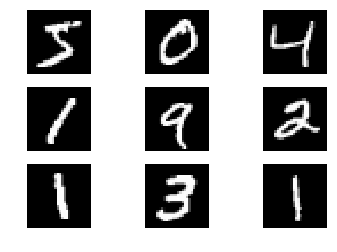

In [16]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i,0], cmap='gray')
    plt.axis("off")

In [18]:
model = Sequential()
model.add(Convolution2D(6,5,5, input_shape = (1, img_rows, img_cols), border_mode="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(16,5,5, border_mode="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(20,5,5))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(84))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10));
model.add(Activation('softmax'))

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta')

In [20]:
nb_epoch = 2
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
         show_accuracy=True, verbose=1, validation_data=(X_test,Y_test))
score = model.evaluate(X_test, Y_test, show_accuracy=True, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 115s - loss: 0.3542 - acc: 0.8888 - val_loss: 0.0683 - val_acc: 0.9787
Epoch 2/2
60000/60000 [==============================] - 114s - loss: 0.1201 - acc: 0.9652 - val_loss: 0.0455 - val_acc: 0.9848
('Test score:', 0.045508847650513051)
('Test accuracy:', 0.98480000000000001)


9/9 [==============================] - 0s


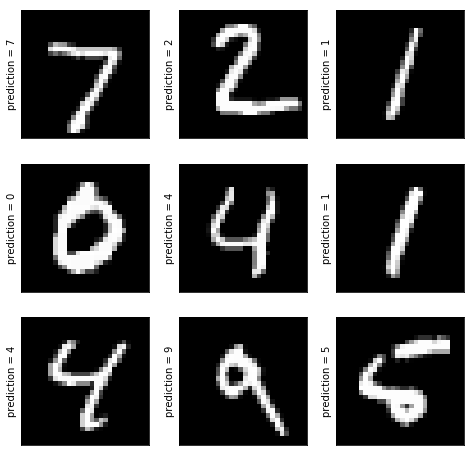

In [25]:
res = model.predict_classes(X_test[:9])
plt.figure(figsize=(8, 8))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i,0], cmap='gray')
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel("prediction = %d" % res[i], fontsize = 10)
    